                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
sentiment
positive    25000
negative    25000
Name: count, dtype: int64
🔍 SVM Performance:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      5000
           1       0.89      0.90      0.89      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

🔍 Random Forest Performance:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      5000
           1       0.86      0.85      0.85      5000

    accurac

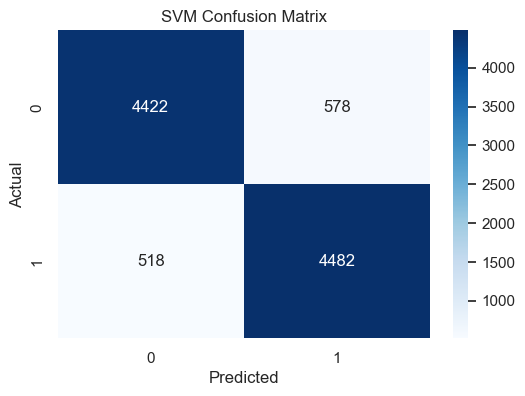

✅ Model and Vectorizer saved successfully.


In [2]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import re
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Optional: For pretty plots
sns.set(style="whitegrid")

# Step 2: Load Dataset
df = pd.read_csv("IMDB Dataset.csv")

# Check dataset
print(df.head())
print(df['sentiment'].value_counts())

# Step 3: Preprocessing
def clean_text(text):
    text = text.lower()
    text = re.sub(r"<.*?>", " ", text)  # Remove HTML tags
    text = re.sub(r"[^a-zA-Z]", " ", text)  # Remove non-letter characters
    text = re.sub(r"\s+", " ", text)  # Remove extra spaces
    return text.strip()

df['clean_review'] = df['review'].apply(clean_text)

# Convert labels to binary
df['label'] = df['sentiment'].map({'positive': 1, 'negative': 0})

# Step 4: TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['clean_review']).toarray()
y = df['label'].values

# Step 5: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Step 6: Train Models

# SVM
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 7: Evaluation

print("🔍 SVM Performance:")
y_pred_svm = svm_model.predict(X_test)
print(classification_report(y_test, y_pred_svm))

print("🔍 Random Forest Performance:")
y_pred_rf = rf_model.predict(X_test)
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix (optional)
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt="d", cmap="Blues")
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 8: Save Best Model
joblib.dump(svm_model, 'sentiment_model.pkl')
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')
print("✅ Model and Vectorizer saved successfully.")
